# Adaptive Exponential Integrate Model (ADEX)

*The model is described by two differential equations*  

$$C\frac{dV}{dt}=−g_L(V−E_L)+g_L*Δ_Texp(\frac{V−V_T}{Δ_T})−w+I$$

$$ τ_w\frac{dw}{dt}=a(V−E_L)−w $$


> V   = Membrane Potential  
> $w$ = Adaptation Variable  
> I   = Input Current  
> C   = Membrane Capacitance  
> g_L = Leak Condunctance  
> E_L = Leak Reversal Potential  
> V_T = The Threshold  
> Δ_T = The Slope Factor    
> a   = The Adaptation Coupling Parameter  
> τ_w = The adaptation Time Constant

In [7]:
from brian2 import *
import matplotlib.pyplot as plt 
C = 1*nF
gL = 30*nS
EL = -70*mV
VT = -50*mV
DeltaT = 2*mV
tauw = 150*ms
a = 4*nS
N = 200

In [8]:
eqs = '''dvm/dt = (gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + I)/C : volt
         dw/dt=(a*(vm-EL)-w)/tauw : amp
         I : amp'''

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


ValueError: x and y must have same first dimension, but have shapes (300,) and (200,)

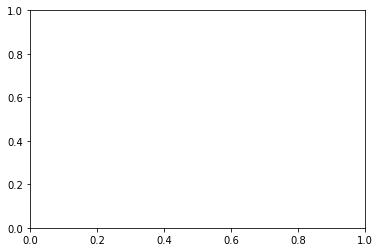

In [10]:
group = NeuronGroup(N, eqs,threshold='vm > -20*mV',reset='vm=-70*mV; w += 0.08*nA',method=euler)
monitor = StateMonitor(group,'vm',record=0,)
run(30*ms)
plt.plot(monitor.t/ms,group.vm/mV)
plt.show()